# CS114.M11 - Máy học
---
### 19521322 - Huỳnh Ngọn Công Danh
### 19521858 - Võ Tuấn Minh
### 19522524 - Nguyễn Phú Vinh

# Tải dữ liệu

In [39]:
!wget https://cs.uit.edu.vn/data2.txt
!wget https://cs.uit.edu.vn/data3.txt
!wget https://cs.uit.edu.vn/data4.txt

--2021-11-30 12:18:06--  https://cs.uit.edu.vn/data2.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 45.122.249.78, 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|45.122.249.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203726 (1.1M) [text/plain]
Saving to: ‘data2.txt.1’

data2.txt.1         100%[===================>]   1.15M  1.13MB/s    in 1.0s    

2021-11-30 12:18:09 (1.13 MB/s) - ‘data2.txt.1’ saved [1203726/1203726]

--2021-11-30 12:18:09--  https://cs.uit.edu.vn/data3.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 45.122.249.78, 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|45.122.249.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178891 (175K) [text/plain]
Saving to: ‘data3.txt.1’

data3.txt.1         100%[===================>] 174.70K   441KB/s    in 0.4s    

2021-11-30 12:18:10 (441 KB/s) - ‘data3.txt.1’ saved [178891/178891]

--2021-11-30 12:18:10--  https://cs.uit.edu.vn/data4.txt
Resolvi

# Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Đọc tập train

In [104]:
df = pd.read_csv('/content/data2.txt', header=None)

# Plot tập train

## Nhận xét
Trong tập train có khoảng 71 nghìn training example, trong đó các giá trị y nằm trong khoảng từ 0.000009 - 0.983776

In [61]:
df.describe()

,0,1
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


In [126]:
X_train = df[0]
y_train = df[1]

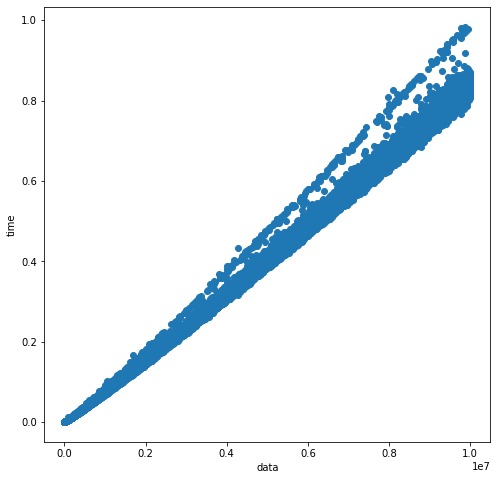

In [127]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train, y_train)
plt.xlabel('data')
plt.ylabel('time')
plt.show()

# Train model

In [128]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [129]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

# Đánh giá trên tập train

## Đánh giá thông qua các hệ số R Squared và Mean Squared Error
Khi đánh giá trong tập train thì các hệ số cho kết quả khá tốt

In [130]:
print("R Squared: %.7f" %r2_score(reg.predict(X_train), y_train))
print("MSE: %.7f" % mean_squared_error(reg.predict(X_train), y_train))

R Squared: 0.9975867
MSE: 0.0001434


Vẽ linear regression line lên biểu đồ. 
Dễ nhận thấy đường thẳng khá fit với dữ liệu train

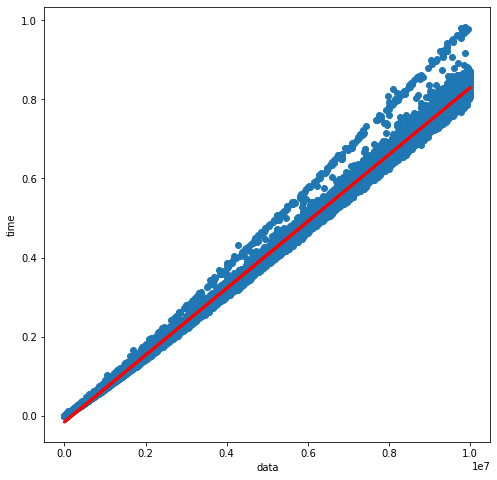

In [131]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train), color='red', linewidth=3)
plt.xlabel('data')
plt.ylabel('time')
plt.show()

# Đánh giá trên tập test

In [80]:
df3 = pd.read_csv('/content/data3.txt', header=None)

In [81]:
X_test = df3[0]
y_test = df3[1]

X_test = np.asarray(X_test)
X_test = X_test.reshape(-1, 1)

y_test = np.asarray(y_test)
y_test = y_test.reshape(-1, 1)

## Nhận xét:
Trong tập test có khoảng 10k example, các giá trị y nằm trong khoảng từ 1.669640 - 4.28766. Các giá trị y trong tập test lớn hơn nhiều so với giá trị y trong tập train.

In [82]:
df3.describe()

,0,1
count,1.059000e+04,10590.000000
mean,2.999277e+07,2.642812
std,5.759381e+06,0.537305
min,2.000026e+07,1.669640
25%,2.503806e+07,2.180550
50%,2.994436e+07,2.639820
75%,3.500845e+07,3.100155
max,3.999734e+07,4.287660


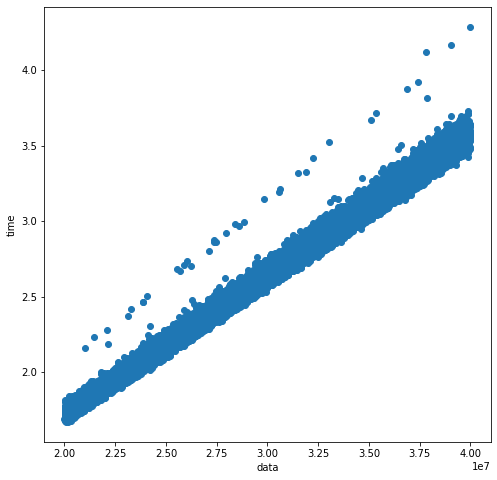

In [83]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test)
plt.xlabel('data')
plt.ylabel('time')
plt.show()

## Nhận xét:
Khi đánh giá bằng hệ số MSE và R Squared trên tập test thì cho kết quả thấp hơn nhưng nhìn vào giá trị này thì có thể xem model khá tốt

In [84]:
print("R Squared: %.7f" %r2_score(reg.predict(X_test), y_test))
print("MSE: %.7f" % mean_squared_error(reg.predict(X_test), y_test))

R Squared: 0.9128585
MSE: 0.0206649


Biểu đồ histogram biểu diễn các giá trị y trong tập train (màu đỏ) và các giá trị y trong tập test (màu xanh). Có thể nhận thấy các dữ liệu này phân bố khác nhau và tách biệt nhau.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

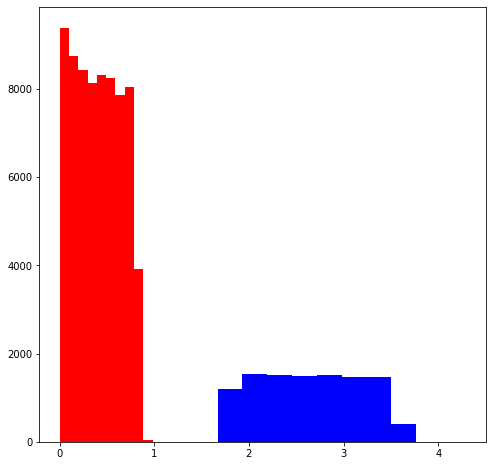

In [20]:
plt.figure(figsize=(8, 8))
plt.hist(y_train, color='red')
plt.hist(y_test, color='blue')
plt

Tuy nhiên khi vẽ linear regression line lên biểu đồ biểu diễn các điểm dữ liệu trên tập test thì có thể thấy được model bị lệch ra ngoài khá nhiều. Nguyên nhân dẫn đến việc này là do trong tập train các giá trị y chỉ nằm trong đoạn nhỏ, làm cho model không có tính tổng quát, model cho kết quả đánh giá tốt trên tập train nhưng kết quả dự đoán trên tập test tệ và đây là dấu hiệu của việc model bị overfitting

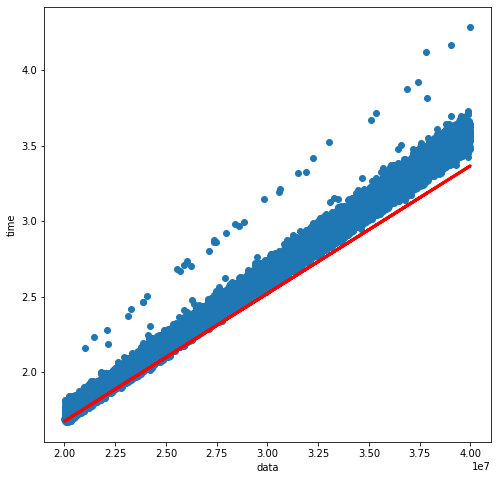

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test)
plt.plot(X_test, reg.predict(X_test), color='red', linewidth=3)
plt.xlabel('data')
plt.ylabel('time')
plt.show()

# Tối ưu bằng select data

In [22]:
df.describe()

,0,1
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


Chọn các training example có giá trị y >= ngưỡng T. Giá trị T được chọn trong khoảng [0.2 - 0.6], step = 0.00001 sao cho model đạt perfomance tốt nhất.s Nếu chọn ngưỡng dưới bé hơn thì sẽ dẫn đến việc có nhiều giá trị y gần bằng 0 làm model mất tính tổng quát, nếu chọn ngưỡng trên cao sẽ dẫn đến việc thiếu training example -> model sẽ không tốt. 

In [23]:
t = 0.2
l = [t + i * 0.00001 for i in range(0, 40000)]

In [24]:
best_lg = None
best_r2_score = 0
best_t = 0.3
s = []

In [25]:
for i in range(len(l)):
  df_cp = df[df[1] >= l[i]]

  X_cp = df_cp[0]
  y_cp = df_cp[1]

  X_cp = np.asarray(X_cp)
  y_cp = np.asarray(y_cp)

  X_cp = X_cp.reshape(-1, 1)
  y_cp = y_cp.reshape(-1, 1)

  lg = LinearRegression().fit(X_cp, y_cp)

  r2_temp = r2_score(lg.predict(X_test), y_test)

  if r2_temp > best_r2_score:
    best_t = l[i]
    best_lg = lg
    best_r2_score = r2_temp
  s.append(r2_temp)

Khi lấy các training example có giá trị y >= 0.49032 thì model cho kết quả tốt hơn. Giá trị R Squared đã được cải thiện lên 0.9634

In [26]:
print(best_t)
print(best_r2_score)

0.49032000000000003
0.9634786544847298


## Biểu đồ biểu diễn R Squared và ngưỡng T
Khi ngưỡng T tăng từ 0.2 lên thì R Squared tăng và đạt max ~ 0.9634 ở giá trị ngưỡng T là ~ 0.49032. Sau đó khi tăng T lên thì R Squared giảm.
Vậy R Squared tối ưu khi chọn các training example có giá trị y >= 0.49032


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

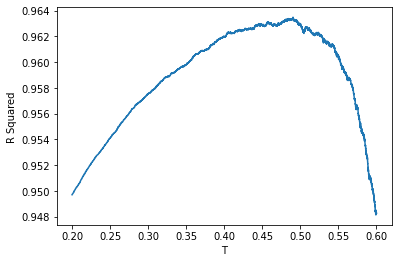

In [27]:
s = np.asarray(s)
plt.plot(l, s)
plt.xlabel('T')
plt.ylabel('R Squared')
plt

Model đã cải thiện hơn nhưng kết quả vẫn chưa tốt. Có thể nhận thấy khi thử trên tập dữ liệu test linear regresion line vẫn lệch xuống dưới khả nhiều

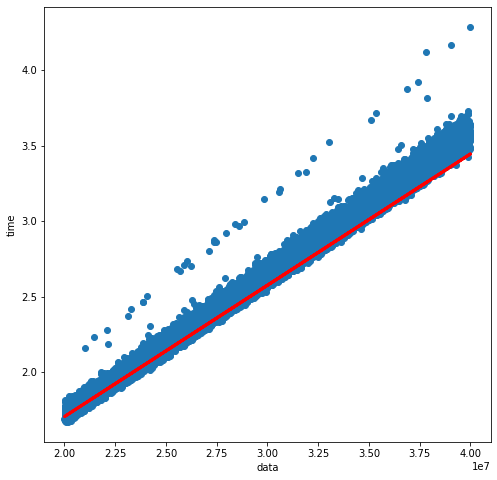

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test)
plt.plot(X_test, best_lg.predict(X_test), color='red', linewidth=3)
plt.xlabel('data')
plt.ylabel('time')
plt.show()

# Tối ưu sử dụng Polynomial Regression

# Biến đổi X thành nhiều features
y = 𝞱_1 x + 𝞱_2x^2 + 𝞱_3*log(x) +𝞱_4*x*log(x) + 𝞱_5*sqrt(x) + 𝞱_0

In [29]:
def func(df):
  X_t = []
  X_t.append(df[0])
  X_t.append(np.sqrt(df[0]))
  X_t.append(np.power(df[0], 2))
  X_t.append(np.log2(df[0]))
  X_t.append(df[0] * np.log2(df[0]))
  X_t.append(np.ones(df.shape[0]))
  X_t = np.asarray(X_t)
  y_t = df[1]
  return X_t.T, y_t

In [85]:
X_train_, y_train_ = func(df)
X_test_, y_test_ = func(df3)

In [89]:
lg = LinearRegression()
lg.fit(X_train_, y_train_)

LinearRegression()

# Đánh giá trên tập data3.txt
Giá trị R Squared được tối ưu hơn tăng từ 0.96 -> 0.98

In [91]:
print("R Squared: %.7f" %r2_score(lg.predict(X_test_), y_test_))
print("MSE: %.7f" % mean_squared_error(lg.predict(X_test_), y_test_))

R Squared: 0.9834996
MSE: 0.0048825


linear regression line đã fit với dữ liệu hơn khi chưa áp dụng polynomial regression

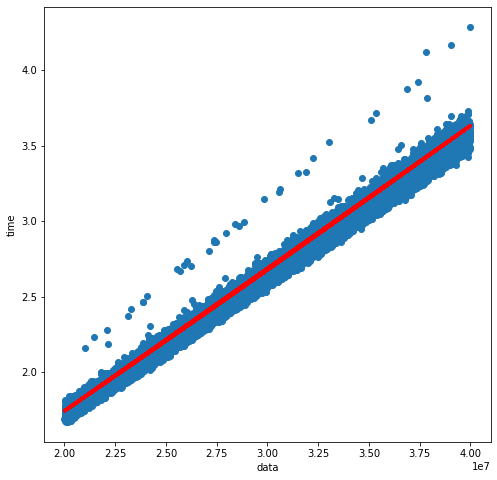

In [35]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test)
plt.plot(X_test, lg.predict(X_test_), color='red', linewidth=3)
plt.xlabel('data')
plt.ylabel('time')
plt.show()

# Đánh giá trên data4.txt

In [92]:
df4 = pd.read_csv('data4.txt', header=None)

In [93]:
X_test4, y_test4 = func(df4)

In [94]:
print("R Squared: %.7f" %r2_score(lg.predict(X_test4), y_test4))
print("MSE: %.7f" % mean_squared_error(lg.predict(X_test4), y_test4))

R Squared: 0.9357681
MSE: 0.0211867


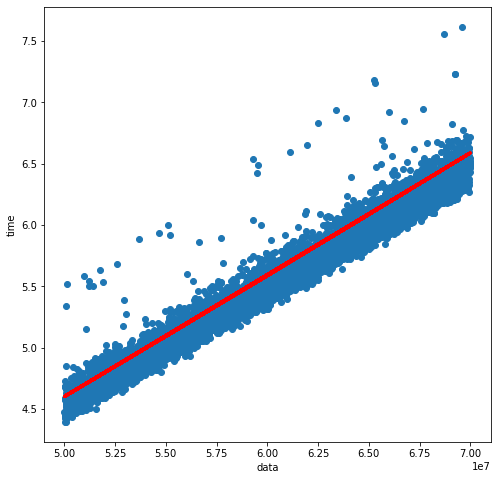

In [95]:
plt.figure(figsize=(8, 8))
plt.scatter(df_test4[0], df_test4[1])
plt.plot(df_test4[0], lg.predict(X_test4), color='red', linewidth=3)
plt.xlabel('data')
plt.ylabel('time')
plt.show()